In [8]:
!ls data

aal.nii.gz       aal.nii.txt      brodmann.nii.lut
aal.nii.lut      brodmann.nii.gz


In [26]:
%matplotlib notebook
from nilearn.plotting import plot_glass_brain,plot_roi
import nibabel as nib
import io
import os
import numpy as np
from matplotlib.colors import ListedColormap
import requests

In [28]:
url = "https://github.com/neurolabusc/MRIcron/raw/master/niftiview7/templates/brodmann.nii.lut"
r = requests.get(url)
open(os.path.join('data',url.rsplit('/', 1)[1]), 'wb').write(r.content)
url = "https://github.com/neurolabusc/MRIcron/raw/master/templates/brodmann.nii.gz"
r = requests.get(url)
open(os.path.join('data',url.rsplit('/', 1)[1]), 'wb').write(r.content)
url = "https://github.com/neurolabusc/MRIcron/raw/master/templates/aal.nii.gz"
r = requests.get(url)
open(os.path.join('data',url.rsplit('/', 1)[1]), 'wb').write(r.content)
url = "https://github.com/neurolabusc/MRIcron/raw/master/templates/aal.nii.lut"
r = requests.get(url)
open(os.path.join('data',url.rsplit('/', 1)[1]), 'wb').write(r.content)


768

# AAL

<IPython.core.display.Javascript object>


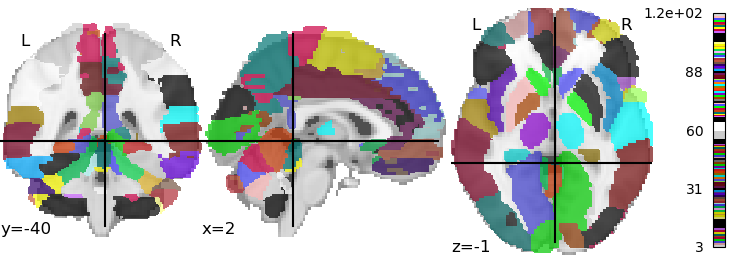

In [29]:
aal_img = nib.load('data/aal.nii.gz')
aal_lut = np.fromfile('data/aal.nii.lut', dtype=np.uint8).reshape(3,256).T/255
plot_roi(aal_img, cmap=ListedColormap(aal_lut),display_mode='ortho',colorbar=True )

<IPython.core.display.Javascript object>


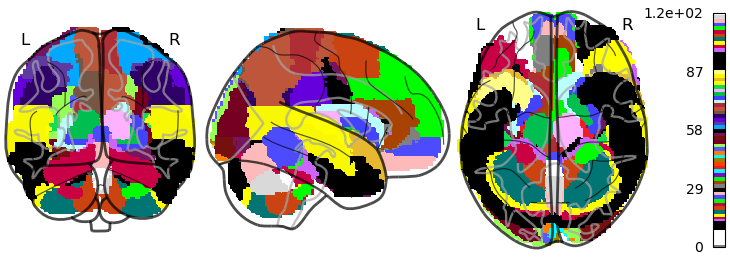

In [12]:
plot_glass_brain(aal_img, cmap=ListedColormap(aal_lut),display_mode='ortho',colorbar=True )

# Brodmann

<IPython.core.display.Javascript object>


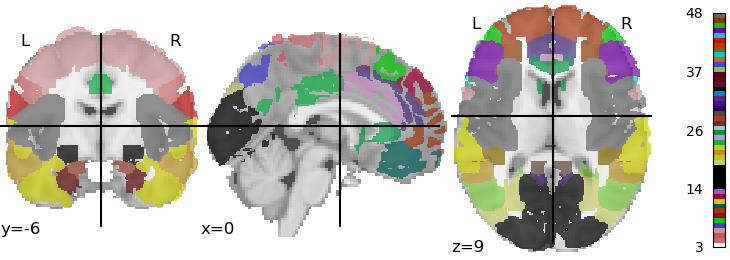

In [30]:
brodmann_nii = nib.load('data/brodmann.nii.gz')
brodmann_lut = np.fromfile('data/brodmann.nii.lut', dtype=np.uint8).reshape(3,256).T/255
brodmann_lut = brodmann_lut[0:49,:]
plot_roi(brodmann_nii, cmap=ListedColormap(brodmann_lut),display_mode='ortho',colorbar=True)

<IPython.core.display.Javascript object>


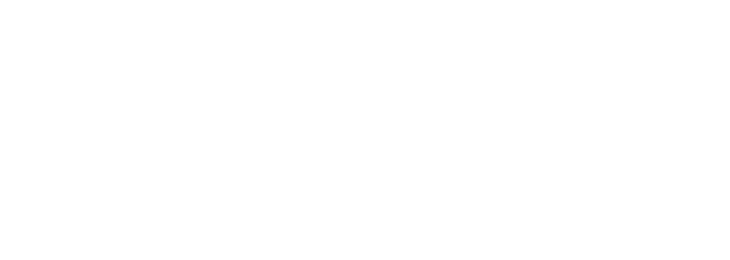

In [31]:
plot_glass_brain(brodmann_nii,cmap=ListedColormap(brodmann_lut),display_mode='ortho',colorbar=True)

In [61]:
brodmann_nii = nib.load('data/brodmann.nii.gz')
print(brodmann_nii)
print(255*(np.unique(brodmann_nii.get_data()/np.amax(brodmann_nii.get_data()))))
print(np.unique(brodmann_img))

<class 'nibabel.nifti1.Nifti1Image'>
data shape (181, 217, 181)
affine: 
[[   1.    0.    0.  -90.]
 [   0.    1.    0. -125.]
 [   0.    0.    1.  -71.]
 [   0.    0.    0.    1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'b'
dim_info        : 0
dim             : [  3 181 217 181   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : label
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [1. 1. 1. 1. 0. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 255
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : unknown
sform_code      : mn

In [32]:
from niwidgets import NiftiWidget
my_widget = NiftiWidget('data/aal.nii.gz')
my_widget.nifti_plotter()

interactive(children=(IntSlider(value=90, continuous_update=False, description='x', max=180), IntSlider(value=…

In [46]:
print(np.unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11 17 18 19 20 21 22 23 24 25 26 27 28
 29 30 32 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48]
